# Mapeo de Hénon


Vamos a analizar un poco sobre otro mapeo, el de Henon. El mapeo de Henon es un mapeo descrito de la forma:
$$ f_{a,b}(x,y)=\left\{ \begin{array}{lcc}
             a-by-x^{2}\\
             \\ x
             \end{array}
             \right.$$
        
        
Para poder analizarlo debemos linearizar el sistema. Primero obtenemos el jacobiano 

$$ DF_{a,b}(x,y)=\left( \begin{array}{lcc}
                \frac{\partial F_{x}}{\partial x} & \frac{\partial F_{x}}{\partial y}\\
                \\ \frac{\partial F_{y}}{\partial x} & \frac{\partial F_{y}}{\partial y}
                \end{array}
                \right)$$
                
            
$$DF_{a,b}(x,y)= \left( \begin{array}{lcc}
                -2x & -b\\
                \\ 1 & 0
                \end{array}
                \right)$$
                
Notamos que el determinante del jacobiano no es igual a uno sino
$$det(DF_{a,b}(x,y))=b$$
El determianate es constante , y sera hamiltoniano en el caso en que $b=1$. Analizaremos esos casos, primero encontrando los puntos fijos.
$$F_{a,b}(x,y)=\left( \begin{array}{lcc}
               a-by-x^{2}\\
               \\ x
               \end{array}
               \right) = \left(\begin{array}{lc}
               x \\
               \\ y
               \end{array}
               \right)$$
               
               
Lo que implica que 
$$a-by-x^{2}=x$$
$$x=y$$ 
de donde es claro que la primer ecuación queda
$$x^{2}+(b+1)x-a=0$$
que se puede resolver usando la fórmula general
$$x=\frac{-(b+1)\pm ((b+1)^{2}+4a)^{1/2} }{2}$$
para el caso en que $b=1$ se tiene
$$x=\frac{-2\pm 2(1+a)^{1/2} }{2}$$
Por lo que escogiendo un valor de a podemos obtenr un punto fijo. 

Para este caso usaremos un valor de $a=.3$ . Por lo que los puntos fijos asociados serán 
$$p_{1}=(0.14017542509913805
,0.14017542509913805
)$$
$$p_{2}=(-2.1401754250991383,-2.1401754250991383)$$

$$p_{1}=(2,2) ;p_{2}=(-4,-4)$$


In [126]:
using TaylorSeries
using PyPlot
using LinearAlgebra

In [127]:
function Henon(x,y,a,b)
   
    x_n = a-b*y-x^2
    y_n = x 

    return [x_n,y_n]
end

Henon (generic function with 1 method)

Para revisar si es punto fijo:

In [128]:
Henon(-2.1401754250991383,-2.1401754250991383,0.3,1.0) .- [-2.1401754250991383,-2.1401754250991383]

2-element Array{Float64,1}:
 -8.88178e-16
  0.0        

In [129]:
"""

PolinomioTaylor1(g,Cθ,CP,TipoVariable)
   
   Es una función cuyo objetivo es recibir dos listas con valores iniciales y crear dos polinomios de grado g.




Argumentos:





   - g       : grado del polinomio
   - Cθ,CP  :  Arreglo que contiene los coeficientes iniciales, es del tipo Array{TaylorSeries.TaylorN{Float64}}
   - TipoVariable :  es el tipo : Real, Float64, BigFloat, etc.
   

    Esta función regresa dos arreglos que contienen elementos del tipo Taylor1.TaylorN, creados con las listas iniciales. 


"""
function PolinomioTaylor1(g::Real,Cθ,CP,TipoVariable)
    #=
    g es el grado del polinomio, CX y CP son
    arreglos que contienen los coeficientes que forman la variedad.
    
    
    Creamos x,p como variables tipo TaylorN de orden 2
    =#
    
    
    
    θ,p = set_variables(TipoVariable, "θ p", order=2)
    
    #especificamos que LX,LP son de arreglos que guardarán coeficientes del polinomio, sólo son auxiliares en esta función
    
   
    Lθ = Array{TaylorSeries.TaylorN{TipoVariable}}(1)
    LP = Array{TaylorSeries.TaylorN{TipoVariable}}(1)
    
   #usamos un condicional para separar el caso 1 del resto
    if g == 1
        
        T = [Taylor1([θ], g),Taylor1([p], g)]
    #en el caso en que g>1 entonces usamos las listas que van guardando los coeficientes
    else
        #como CX,CP están guardando los coeficientes pero necesitamos agregar el último término que será una variable 
        
        Lθ = push!(Cθ, θ) 
        LP = push!(CP, p)

        T=[Taylor1(Lθ, g),Taylor1(LP, g)]
        
    end
    return T
end
#Esta función regresa tθ,tp que son Taylor1.TaylorN

PolinomioTaylor1

In [130]:
#=Esta función toma el arreglo que contiene las lambdas que se van calculando, los coeficientes de los polinomios
y el orden de los mismos, lo que hace es generar el lado derecho de la ecuación cohomológica, multiplicando a_n*λ^n
y generando un polinomio de gradno g con estos coeficientes
=#
"""
Vecλ(λ_v,g,Cθ,CP)
Es una función que calcula la parte derecha de la ecuación comohológica, es decir la parte que involucra el valor propio.
Regresa un arreglo de tipo TaylorSeries.TaylorN{Float64}


Sus argumentos son:
-g      :  grado del polinomio.
-λ_v    :  Arreglo de dos dimensiones que contiene el valor propio y sus potencias. 
-Cθ,CP  :  Los arreglos con los polinomios que se calculan en PolinomioTaylor1.

"""
function Vecλ(λ_v,g,Cθ,CP)
   # el arreglo de λ_v contiene los arreglos que corresponden a la parte derecha de la ecuación cohomológica
    # en θ,p. Es importante hacer la distinción puesto que dependiendo del punto fijo donde se esté calculando
    # el primer valor de λ en θ serpa diferente del primer valor de λ en P
    θλt=Taylor1(λ_v[1].*Cθ,g)
    pλt=Taylor1(λ_v[2].*CP,g)
    
    λvec=[θλt,pλt]
    
    return λvec
end

Vecλ

In [131]:
function ValPropios(M)
    V = BigFloat[]
    disc = trace(M)^2-4.*det(M)
    disc >= 0.? v = ((trace(M) + sqrt(trace(M)^2-4.*det(M)))/2.,(trace(M) - sqrt(trace(M)^2-4.*det(M)))/2.)  : error("Error: el valor propio es complejo, es decir es un punto elíptico")
    v_prop1 = v[1]
    v_prop2 = v[2]
    # dado que hay unos casos en los que esto truena, 
    #debo integrag alguna forma de revisar que no sea el caso que estamos calculando
    push!(V,v_prop1)
    push!(V,v_prop2)
    ValoresP = sort(V,rev=true)
return ValoresP
end
        
    
    
    

ValPropios (generic function with 1 method)

In [132]:
function VecPropios(M,ValoresP)
    Vectores = []
    for i in [1,2]
        y = big.(1.)
        I_2 = big.([1. 0.; 0. 1.])
        M_aux = -I_2.*ValoresP[i]+M
        x = -(y*M_aux[3])/M_aux[1]
        push!(Vectores,x)
        push!(Vectores,y)
    end
    return Vectores
end

VecPropios (generic function with 1 method)

In [133]:
function EigenValores(M)
    ValoresP  = ValPropios(M)
    VectoresP = VecPropios(M,ValoresP)
    V = (ValoresP,[VectoresP[1] VectoresP[3];VectoresP[2] VectoresP[4]])
    return V
end

EigenValores (generic function with 1 method)

In [134]:
function Orden1(Cθ,CP,TipoVariable,Mapeo,k,l,PuntoFijo,tipo_v,λarrayθ,λarrayP)
            #usamos la función PolinomioTaylor para crear el polinomio tipo Taylor1.TaylorN{T}
            t = PolinomioTaylor1(1,Cθ,CP,TipoVariable)
            @show(typeof(t))
            #Aplicamos el mapeo a los polinomios que resultan de la función anterior.
            Or1 = Mapeo(t[1],t[2],k,l)
            @show(typeof(Or1))
            AuxOr1=[Or1[1][1],Or1[2][1]]
            @show(typeof(AuxOr1))
            #Calculamos el jacobiano del Orden 1 para obtener sus valores y vectores propios.
            JPO = jacobian(AuxOr1,[PuntoFijo[1],PuntoFijo[2]])
            @show(typeof(JPO))
            @show(JPO)
            @show(det(JPO))
            
            
            #Calculamos los valores y vectores propios
            if TipoVariable == BigFloat
                eigval,eigvec = EigenValores(JPO)
            else
                eigval,eigvec = eig(JPO)
            end
            #escogemos el tipo de variedad que queremos calcular. Como se ordenan de menor a mayor la inestable es la segunda
            λ = eigval[tipo_v]
    
            tt = imag(λ)
            @show(tt)
            #Ponemos los coeficientes en una variable nueva cada uno y los agregamos a las listas CX,CP,λ
            tt == 0.?  Coef = eigvec[:,tipo_v] : error("Error: el valor propio es complejo, es decir es un punto elíptico")
            @show(typeof(Coef[1]))
            #@show(Coefθ,CoefP)
            push!(Cθ, Coef[1])
            push!(CP, Coef[2])
            push!(λarrayθ, λ)
            push!(λarrayP, λ)
            λ_v=[λarrayθ,λarrayP]
            
            #@show(λarray)  
            @show(typeof(Cθ))
            @show(typeof(λarrayθ))
    return Cθ, CP,λarrayθ,λarrayP, λ_v
end
            
    

Orden1 (generic function with 1 method)

In [135]:
#Creamos una función que reciba el orden del polinomio , el punto fijo, el parámetro k y 
#el tipo de varidad que queremos(estable=1, inestable=2)
"""
Variedades(Mapeo,orden, PuntoFijo,k,tipo_v,TipoVariable)
Es una función que calcula las variedades de cierto mapeo. Usa las funciones de PolinomioTaylor1 y Vecλ para calcular los
polinomios de cada lado de la ecuación cohomológica y les aplica el mapeo dado. 



Argumentos:


- Mapeo : Mapeo de dos dimensiones, debe recibir al menos dos parámetros que son los polinomios antes calculados.
- orden : se trata del orden del polinomio.
- PuntoFijo : ES el punto fijo donde queremos calcular la variedad.
- k     : Es la constante del mapeo.
- tipo_v : 1 si la variedad es estable, 2 si es inestable.
- TipoVariable :  Float64,BigFloat, Integer,etc.


"""
function Variedades(Mapeo,orden, PuntoFijo,k,l,tipo_v, TipoVariable)
   
    #definimos unas listas donde se guardarán los coeficientes  de todo el polinomio, tales deben ser
    # de tipo "Array{TaylorSeries.TaylorN{Int64},1}" dado que los términos que se van agregando 
    # en cada orden son de tipo TaylorN.
    
    a=TipoVariable(PuntoFijo[1])
    b=TipoVariable(PuntoFijo[2])
    Cθ = [a+TaylorN(0.)]
    CP = [b+TaylorN(0.)]
    
    
    #λarray es la lista que contiene a los coeficientes del polinomio de λ
    λarrayθ = [a^0]
    λarrayP = [b^0]
    
    #definimos un vector que contiene el punto en el que se evalúa el jacobiano que se calcula después
    #dado que sólo lo usamos para obtener los valores que resultaron en el mapeo evaluamos siempre en [1.,1.]
    
    
    
    
    Cθ,CP,λarayθ, λarrayP,λ_v = Orden1(Cθ,CP,TipoVariable,Mapeo,k,l,PuntoFijo,tipo_v,λarrayθ,λarrayP)
    


    for g in 2:orden
        
            #Creamos los polinomios con las listas correspondientes 
            t = PolinomioTaylor1(g,Cθ,CP,TipoVariable)
            
            # aplicamos el mapeo estándar y al resultado le llamamos OrG por Orden g.
            OrG = Mapeo(t[1],t[2],k,l)
            
            push!(λarrayθ,λarrayθ[2]^g)
            push!(λarrayP,λarrayP[2]^g)
            λ_v=[λarrayθ,λarrayP]
            
            #agregamos el término correspondiente a λ 
            λ_vec=Vecλ(λ_v,g,Cθ,CP)
            
            
            #@show(λvec)
            
            # ahora ya tengo las dos partes de la ecuación y debo igualarlas para resolver.
            EcuaCohomo=OrG-λ_vec
            
            
            # de esta ecuación necesitamos solo los de orden g, así que los extraemos manualmente 
            θ_g=EcuaCohomo[1].coeffs[g+1]
            p_g=EcuaCohomo[2].coeffs[g+1]
            vec_orden_g=[θ_g,p_g]
            
            
            #calculamos el término independiene en la ecuación
            θ_ind=EcuaCohomo[1].coeffs[g+1].coeffs[1].coeffs[1]
            p_ind=EcuaCohomo[2].coeffs[g+1].coeffs[1].coeffs[1]
            vec_ind=[-θ_ind,-p_ind]
            
            #calculamos el jacobiano
            JacOrdenG = jacobian(vec_orden_g)
            
            
            
            
            #Con esta información podemos evaluar lo siguiente:
            # Si el vector de términos independientes es cero y el determinante del jacobiano es distinto de cero
            # entonces la solución a la ecuación cohomológica es la trivial
            if norm(vec_ind)==0.
                if det(JacOrdenG)!=0.
                    
                    Cθ[g+1]=0.
                    CP[g+1]=0.
                end
            else
                # Si el vector de términos independientes es distinto de ceroentonces necesitamos 
                #resolver la ecuación JacOrdenG[x_g,p_g]*[x,p]**=vec_ind[x_g,p_g]
                # entonces solo se trata de invertir el jacobiano y multiplicar con el vector del lado izquierdo
                TermG=JacOrdenG \ vec_ind
                
                Cθ[g+1]=TermG[1]
                CP[g+1]=TermG[2]
            
            end
            

    end
    return Cθ,CP,λarrayθ, λarrayP
end

Variedades

In [136]:
"""
PolinomioCohomo(Mapeo,Pol_vec,λvec, k)
Esta función calcula la ecuación cohomológica con los polinomios que ya se calcularon. Regresa un arreglo de dos 
elementos que son los valores de x,θ del mapeo.


Argumentos:
-Mapeo : función o mapeo del cual calculamos las variedades.Debe ser una función que reciba tres parámetros
 que son dos de sus variables y la constante del mapeo. Como salida debe tener un arreglo de dos elementos. 
-Pol_vec : Es un arreglo de dos elementos que son los polinomios calculados con anterioridad. 
-k     : es el valor de la constante del mapeo 
-λvec : 

"""
function PolinomioCohomo(Mapeo,Pol_vec,λvec, k,l ,PuntoFijo,modulo)
    Map_vec=Mapeo(Pol_vec[1],Pol_vec[2],k,l)
    if modulo==2*pi
        Ec_Cohomo = mod(Map_vec-λvec,modulo)
    else
        Ec_Cohomo = Map_vec-λvec
    end
    return Ec_Cohomo
end

PolinomioCohomo

In [137]:
"""
EvaluarPol(Ec_2var,Tiempo,paso)

Es una función que toma un arreglo de dos dimensiones que contiene polinomios y los evalúa en el tiempo dado en los pasos deseados




Argumentos:

-Ec_2var : Arreglo de dos dimensiones que contiene polinomios en cada una de ellas. 
-Tiempo  : Valor hasta el cual se quiere evaluar cada polinomio
-paso    : es el paso que se considera en cada evaluación del polinomio. 

"""
function EvaluarPol(Ec_2var,Tiempo,paso,TipoVariable)
    
    
    
    
    
    Val=TipoVariable[]
    Tiem=TipoVariable[]
    
    
    for t = 0:paso:Tiempo
        x = evaluate(Ec_2var[1], t)
        y = evaluate(Ec_2var[2], t)

        
        norma = norm([x,y],Inf)
        push!(Val,norma)
        push!(Tiem,t)
    
    end
    return Tiem,Val
end

EvaluarPol

In [138]:
"""
CreaPol es una función que dadas dos listas y un grado crea  un arreglo de dos entradas , en cada una de ellas se encuentra 
el polinomio de grado g con los coeficientes de las listas. 


Argumentos:


- A,B : arreglos que contienen lo que serán los coeficientes del polinomio.
- orden : grado del polinomio
"""
function CreaPol(A,B,orden)
    Taylor = [Taylor1(A,orden),Taylor1(B,orden)]
    return Taylor
end

CreaPol

In [139]:
function MetParametrización(Mapeo,modulo,orden,PuntoFijo,k,l,tipo_v,Tiempo,paso, TipoVariable)
    Coeficienteθ,CoeficienteP,λarrayθ,λarrayP = Variedades(Mapeo,orden,PuntoFijo,k,l,tipo_v,TipoVariable)
        
    
    θ = TipoVariable[]
    P = TipoVariable[]
    
    for i in 1:orden+1
            
        push!(θ,Coeficienteθ[i].coeffs[1].coeffs[1])
        push!(P,CoeficienteP[i].coeffs[1].coeffs[1])
        
    end
    
    Taylor=CreaPol(θ,P,orden)
    
    λ_vec=CreaPol(θ.*λarrayθ,P.*λarrayP,orden)
    
    
    
    Ecua_Cohomo = PolinomioCohomo(Mapeo,Taylor,λ_vec, k,l,PuntoFijo,modulo)
    Valor_t , Error = EvaluarPol(Ecua_Cohomo,Tiempo,paso, TipoVariable)
    ErrorV = [Valor_t,Error]
    
    
    return Taylor,ErrorV,λ_vec
   
end

MetParametrización (generic function with 1 method)

In [140]:
using PyPlot

Aquí vemos que si el punto  que se introduce es elíptico entonces resulta un error.

In [141]:
#Usando Float64
Polinomio,E,ValProp = MetParametrización(Henon,1., 25, [.22,.22], .5, 1., 2, 2.9, 0.125, Float64)

typeof(t) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}
typeof(Or1) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}
typeof(AuxOr1) = Array{TaylorSeries.TaylorN{Float64},1}
typeof(JPO) = Array{Float64,2}
JPO = [-0.44 -1.0; 1.0 0.0]
det(JPO) = 1.0
tt = -0.9754998718605759


LoadError: Error: el valor propio es complejo, es decir es un punto elíptico

Calculamos el mismo polinomio pero ahora usando BigFloat para ver la diferencia sobre todo en el error. 

In [142]:
#Usando BigFloat
PolinomioB,EBig,ValPropB = MetParametrización(Henon,1.,25,[.22,.22],.5 ,1.0,2,2.9,0.125,BigFloat)

typeof(t) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{BigFloat}},1}
typeof(Or1) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{BigFloat}},1}
typeof(AuxOr1) = Array{TaylorSeries.TaylorN{BigFloat},1}
typeof(JPO) = Array{BigFloat,2}
JPO = BigFloat[-4.400000000000000022204460492503130808472633361816406250000000000000000000000000e-01 -1.000000000000000000000000000000000000000000000000000000000000000000000000000000; 1.000000000000000000000000000000000000000000000000000000000000000000000000000000 0.000000000000000000000000000000000000000000000000000000000000000000000000000000]
det(JPO) = 1.000000000000000000000000000000000000000000000000000000000000000000000000000000


LoadError: Error: el valor propio es complejo, es decir es un punto elíptico

Graficamos ahora para valores en los que estamos seguron son puntos hiperbólicos.

In [192]:
parametro = 8.
x1 = -1.+(1.+parametro)^.5
x2 = -1.-(1.+parametro)^.5
@show(x1,x2)


x1 = 2.0
x2 = -4.0


-4.0

In [189]:
Polinomio,E,ValProp = MetParametrización(Henon,1., 25, [2.,2.], 8., parametro, 2, 60., 0.125, Float64)

typeof(t) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}
typeof(Or1) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}
typeof(AuxOr1) = Array{TaylorSeries.TaylorN{Float64},1}
typeof(JPO) = Array{Float64,2}
JPO = [-4.0 -1.0; 1.0 0.0]
det(JPO) = 1.0
tt = 0.0
typeof(Coef[1]) = Float64
typeof(Cθ) = Array{TaylorSeries.TaylorN{Float64},1}
typeof(λarrayθ) = Array{Float64,1}


(TaylorSeries.Taylor1{Float64}[ 2.0 + 0.25881904510252085 t - 0.003721516561543372 t² - 4.0133306782994675e-5 t³ + 3.497395332788283e-8 t⁴ + 4.400241418505495e-10 t⁵ - 5.832015065427297e-13 t⁶ - 6.33357378317998e-16 t⁷ + 7.992755224852354e-19 t⁸ + 5.889597072050148e-22 t⁹ - 3.77773974855759e-25 t¹⁰ - 3.2014571012840924e-28 t¹¹ + 2.8213482668395547e-32 t¹² + 5.564171570674634e-35 t¹³ + 1.3503692809761105e-40 t¹⁴ - 5.4201402707185965e-42 t¹⁵ - 3.4733671042545936e-47 t¹⁶ + 3.4473379265200725e-49 t¹⁷ - 8.365280819540491e-54 t¹⁸ - 1.4366141919755122e-56 t¹⁹ + 9.6351525916137e-61 t²⁰ + 3.610355806772482e-64 t²¹ - 4.027966054261859e-68 t²² - 4.832938102127817e-72 t²³ + 7.858913385135908e-76 t²⁴ + 3.900613238995299e-80 t²⁵ + 𝒪(t²⁶), 2.0 - 0.9659258262890684 t - 0.05183403899401222 t² + 0.002086159872716293 t³ + 6.784766662709041e-6 t⁴ - 3.185768709304878e-7 t⁵ - 1.575810254837999e-9 t⁶ + 6.386775740152181e-12 t⁷ + 3.007993499201332e-14 t⁸ - 8.272056879242835e-17 t⁹ - 1.980192954978737e-19 t¹⁰ 

In [176]:
PolinomioB,EBig,ValPropB = MetParametrización(Henon,1.,25,[-4,-4],8. ,1.0,2,60.,0.125,Float64)

typeof(t) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}
typeof(Or1) = Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}
typeof(AuxOr1) = Array{TaylorSeries.TaylorN{Float64},1}
typeof(JPO) = Array{Float64,2}
JPO = [8.0 -1.0; 1.0 0.0]
det(JPO) = 1.0
tt = 0.0
typeof(Coef[1]) = Float64
typeof(Cθ) = Array{TaylorSeries.TaylorN{Float64},1}
typeof(λarrayθ) = Array{Float64,1}


(TaylorSeries.Taylor1{Float64}[ - 4.0 + 0.1260042924827281 t - 0.00029402003192727596 t² + 1.5436577541144075e-7 t³ - 3.269412618754567e-11 t⁴ + 3.274221590846635e-15 t⁵ - 1.8426340051999437e-19 t⁶ + 6.435354642681214e-24 t⁷ - 1.4834660577991443e-28 t⁸ + 2.36467226199221e-33 t⁹ - 2.715344694782344e-38 t¹⁰ + 2.3248053839091776e-43 t¹¹ - 1.5259816016716267e-48 t¹² + 7.852827957547396e-54 t¹³ - 3.2264875696505416e-59 t¹⁴ + 1.0749279424692198e-64 t¹⁵ - 2.954415299467217e-70 t¹⁶ + 6.736211472973668e-76 t¹⁷ - 1.3177747429038154e-81 t¹⁸ + 8.043058733543795e-87 t¹⁹ + 𝒪(t²⁶), - 4.0 + 0.9920296962671667 t - 0.018224498486591245 t² + 7.533018207614402e-5 t³ - 1.2561082430288553e-7 t⁴ + 9.903865457158737e-11 t⁵ - 4.388085472577151e-14 t⁶ + 1.206556919569504e-17 t⁷ - 2.1897386098449265e-21 t⁸ + 2.748052030072825e-25 t⁹ - 2.4843815664064053e-29 t¹⁰ + 1.6746316467208952e-33 t¹¹ - 8.654075514917015e-38 t¹² + 3.506181984103808e-42 t¹³ - 1.1341660123786107e-46 t¹⁴ + 2.9742611859008247e-51 t¹⁵ - 6.407310

Graficaremos el error cometido que es el que nos dirá cuanta diferencia hay entre tipos de números. 

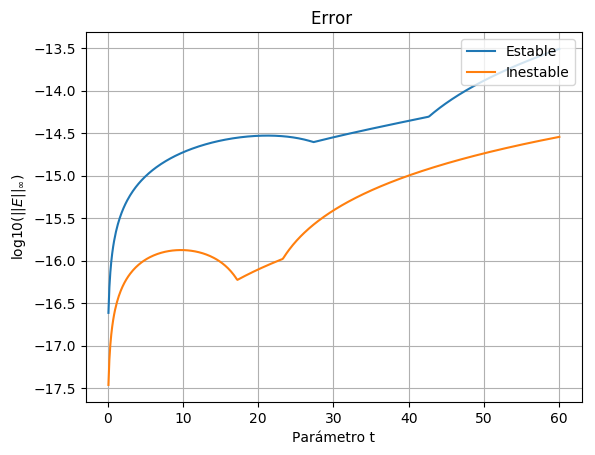

PyObject <matplotlib.legend.Legend object at 0x7fd414d43050>

In [177]:
plot(E[1],log10(E[2]),marker= "None", label="Estable")
plot(EBig[1],log10(EBig[2]),marker= "None", label="Inestable")
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error ")
grid("on")
legend(loc="upper right",fancybox="true" )

Para observar cómo va la variedad graficaremos el espacio fase

In [185]:
#esta es una función para evaluar el los polinomios que calculamos
# recibe como entrada el tiempo que es el valor del parámetro t, el paso
# que define en pasos de cuanto queremos ir evaluando y claro los polinomios A,B
function evaluar(Tiempo, paso,A,B,vari)
    ValX=Float64[]
    
    ValY=Float64[]

    for t = 0:paso:Tiempo
        #=
        x = mod(evaluate(A,t),2*pi)
        y = mod(evaluate(B,t),2*pi)
        =#
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="-",label = vari)
    
end

evaluar (generic function with 2 methods)

In [186]:
function Graficar(Tiempo, paso, k,l,A,B,vari)
    #graficarMap(k,l)
    evaluar(Tiempo,paso,A,B,vari)
end

Graficar (generic function with 2 methods)

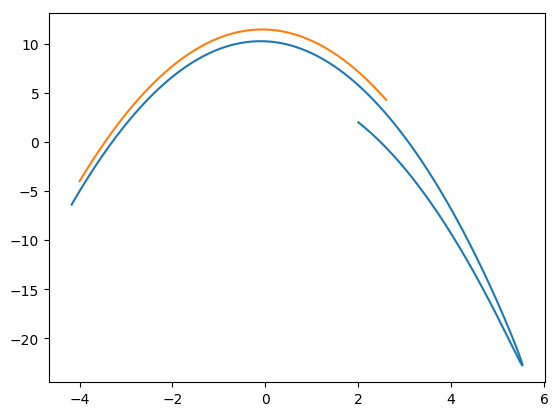

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd4144c3a10>

In [187]:
Graficar(60.7,0.025,8.,1.,Polinomio[1],Polinomio[2],"estable")
Graficar(60.7,0.025,8.,1.,PolinomioB[1],PolinomioB[2],"inestable")

In [196]:
Henon(-4,-4,8,1)+[4.,4.]

2-element Array{Float64,1}:
 0.0
 0.0